In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [20]:
def tensor_to_dataframe(tensor):
    loss_list = []
    for i in range(tensor.shape[0]):
        batch_loss = pd.DataFrame(tensor[i, :, :].numpy())
        batch_loss["epoch"] = i
        loss_list.append(batch_loss)
    loss_df = pd.concat(loss_list, axis=0)
    return loss_df

In [21]:
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs')

In [22]:
# 3, 4, 6 => few epochs (simulations)
# 0, 1, 2, 5 => many epochs (simulations)
# 1 has strange performance

In [23]:
simulation_name = "simulation1c"
dataset_name = "erdos_renyi"

target_path = os.path.join(outputs_path, simulation_name, dataset_name)
models = os.listdir(target_path)
all_test_data = []
agg_metrics = []
all_metrics_by_true_cov = []
all_diff_by_true_cov = []
# for model in models:
model = "sdne7_50_1_1_100"

# load data
training_info = load_pickle(os.path.join(target_path, model, 'training_info.pkl'))
predictions = load_pickle(os.path.join(target_path, model, 'predictions.pkl'))

# parse data
train_loss = tensor_to_dataframe(tensor=training_info["train_loss"]).reset_index(drop=True)
if "val_loss" in training_info.keys():
    val_loss = tensor_to_dataframe(tensor=training_info["val_loss"]).reset_index(drop=True)
    
if "train_predictions" in predictions.keys():
    train_predictions = tensor_to_dataframe(tensor=predictions["train_predictions"]).reset_index(drop=True)
elif "epochs_train_predictions" in predictions.keys():
    train_predictions = tensor_to_dataframe(tensor=predictions["epochs_train_predictions"]).reset_index(drop=True)
train_predictions["error"] = train_predictions[0] - train_predictions[1]

if "test_predictions" in predictions.keys():
    test_predictions = tensor_to_dataframe(tensor=predictions["test_predictions"]).reset_index(drop=True)
elif "epochs_test_predictions" in predictions.keys():
    test_predictions = tensor_to_dataframe(tensor=predictions["epochs_test_predictions"]).reset_index(drop=True)
test_predictions["error"] = test_predictions[0] - test_predictions[1]

In [14]:
training_info.keys()

dict_keys(['train_loss', 'epochs_global_loss', 'epochs_local_loss', 'epochs_reg_loss', 'val_loss', 'val_global_loss', 'val_local_loss', 'val_reg_loss'])

In [15]:
predictions.keys()

dict_keys(['epochs_train_predictions', 'epochs_val_predictions', 'test_predictions'])

In [16]:
train_loss.shape

(2424000, 3)

In [17]:
# val_loss.shape

## Type I Training

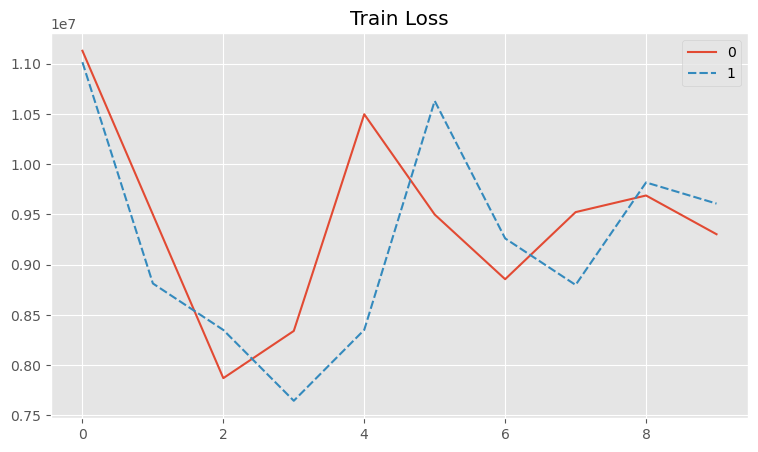

In [12]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.drop(["batch"], axis=1).reset_index(drop=True))
plt.title(f"Train Loss")
plt.show()

In [53]:
# plt.figure(figsize=(9, 5))
# sns.lineplot(data=train_loss.drop(["batch"], axis=1).reset_index(drop=True).loc[5:])
# plt.title(f"Train Loss")
# plt.show()

## Type II Training

In [25]:
train_loss.tail()

,0,1,epoch
2423995,21.704515,27.403507,100
2423996,22.572739,17.500336,100
2423997,17.804478,22.041393,100
2423998,16.686920,20.279284,100
2423999,36.779060,37.105152,100


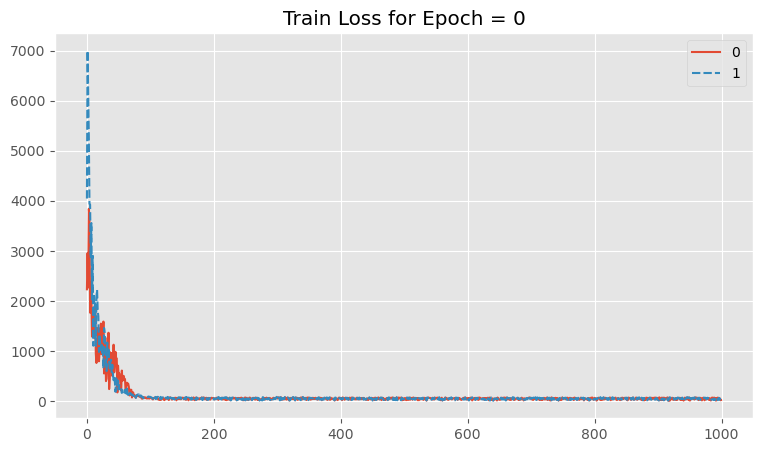

In [32]:
epoch_idx = 0

plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.loc[train_loss["epoch"] == epoch_idx].drop(["epoch"], axis=1).reset_index(drop=True)[0:1000])
plt.title(f"Train Loss for Epoch = {epoch_idx}")
plt.show()

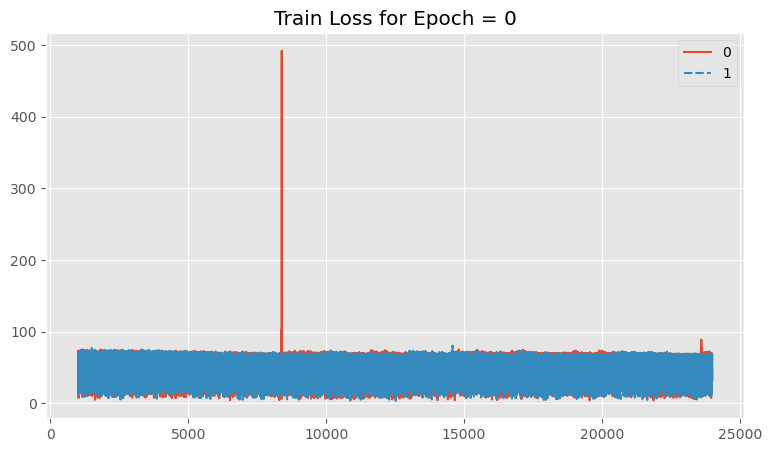

In [30]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.loc[train_loss["epoch"] == epoch_idx].drop(["epoch"], axis=1).reset_index(drop=True)[1000:])
plt.title(f"Train Loss for Epoch = {epoch_idx}")
plt.show()

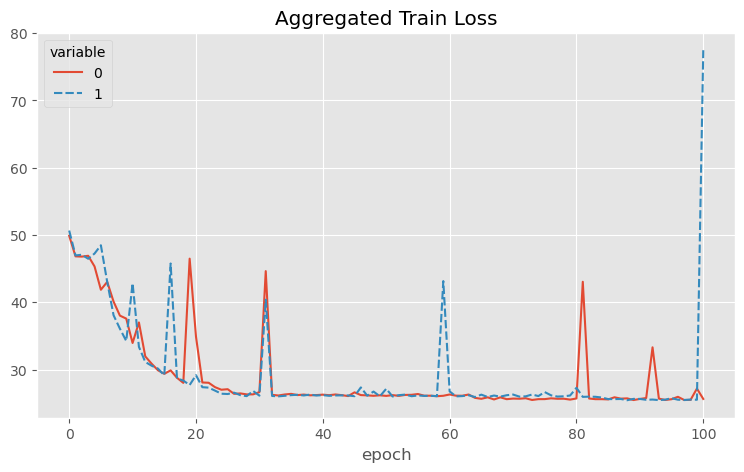

In [34]:
agg_train_pivot = train_loss.melt(["epoch"]).groupby(["epoch", "variable"]).mean().pivot_table(index="epoch", columns="variable", values="value")

plt.figure(figsize=(9, 5))
sns.lineplot(data=agg_train_pivot)
plt.title(f"Aggregated Train Loss")
plt.show()

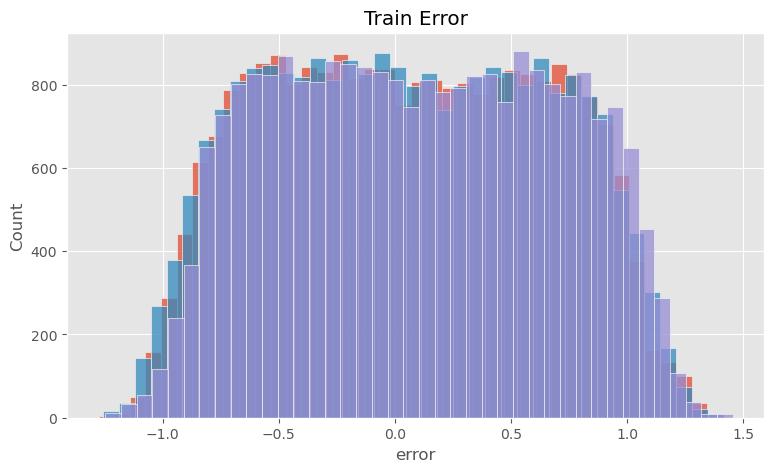

In [29]:
plt.figure(figsize=(9, 5))
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 0, "error"])
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 1, "error"])
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 2, "error"])
plt.title("Train Error")
plt.show()

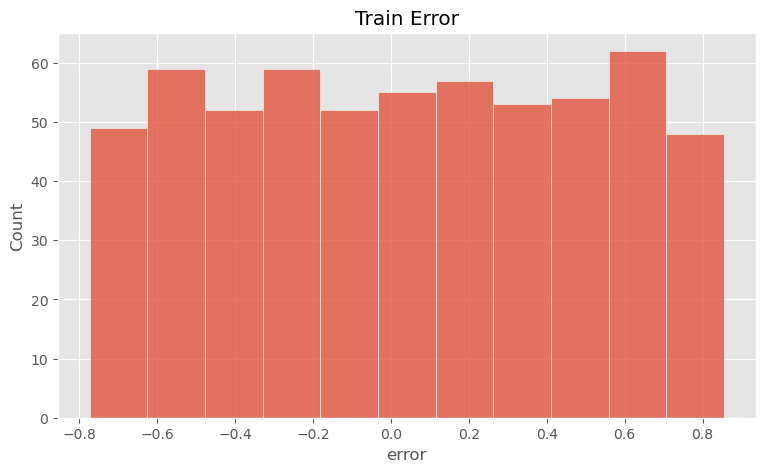

In [30]:
plt.figure(figsize=(9, 5))
sns.histplot(data=test_predictions.loc[:, "error"])
plt.title("Train Error")
plt.show()

## Type II Validation

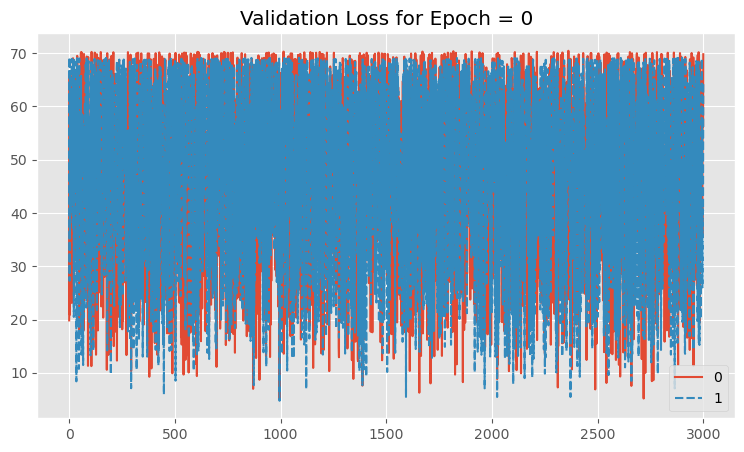

In [36]:
epoch_idx = 0

plt.figure(figsize=(9, 5))
sns.lineplot(data=val_loss.loc[val_loss["epoch"] == epoch_idx].drop(["epoch"], axis=1).reset_index(drop=True))
plt.title(f"Validation Loss for Epoch = {epoch_idx}")
plt.show()

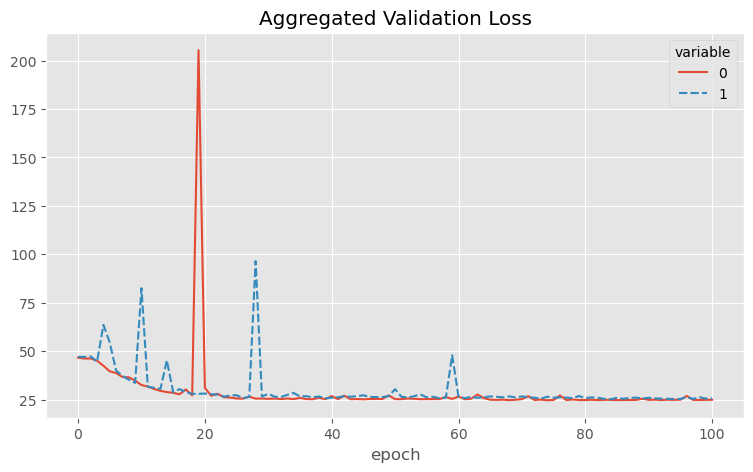

In [37]:
agg_validation_pivot = val_loss.melt(["epoch"]).groupby(["epoch", "variable"]).mean().pivot_table(index="epoch", columns="variable", values="value")

plt.figure(figsize=(9, 5))
sns.lineplot(data=agg_validation_pivot)
plt.title(f"Aggregated Validation Loss")
plt.show()